<a href="https://colab.research.google.com/github/sofiane1010/SIC_checkpoints/blob/main/Checkpoint_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import graphviz

In [67]:
data = pd.read_csv("titanic.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)

In [68]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,male,28.0,13.0000,S,Mrs,1
1,0,3,male,25.0,7.6500,S,Mrs,1
2,0,3,male,20.0,7.8542,S,Mrs,1
3,0,3,female,29.0,21.0750,S,Mrs,5
4,0,1,male,31.0,52.0000,S,Mrs,2


In [69]:
def preprocess_data(new_data):
  cleanup = {
    "Title": {"Mrs" : 1, "Miss" : 2, "Officer" : 3, "Royalty" : 4, "Master" : 5},
    "Embarked" : {"S" : 1, "C" : 2, "Q" : 3},
    "Sex": {"male" : 1, "female" : 0},
  }
  new_data.replace(cleanup, inplace=True) 
  return new_data


data = preprocess_data(data)

In [70]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,1,28.0,13.0000,1,1,1
1,0,3,1,25.0,7.6500,1,1,1
2,0,3,1,20.0,7.8542,1,1,1
3,0,3,0,29.0,21.0750,1,1,5
4,0,1,1,31.0,52.0000,1,1,2


In [71]:
x=data.drop("Survived", axis=1)
y= data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


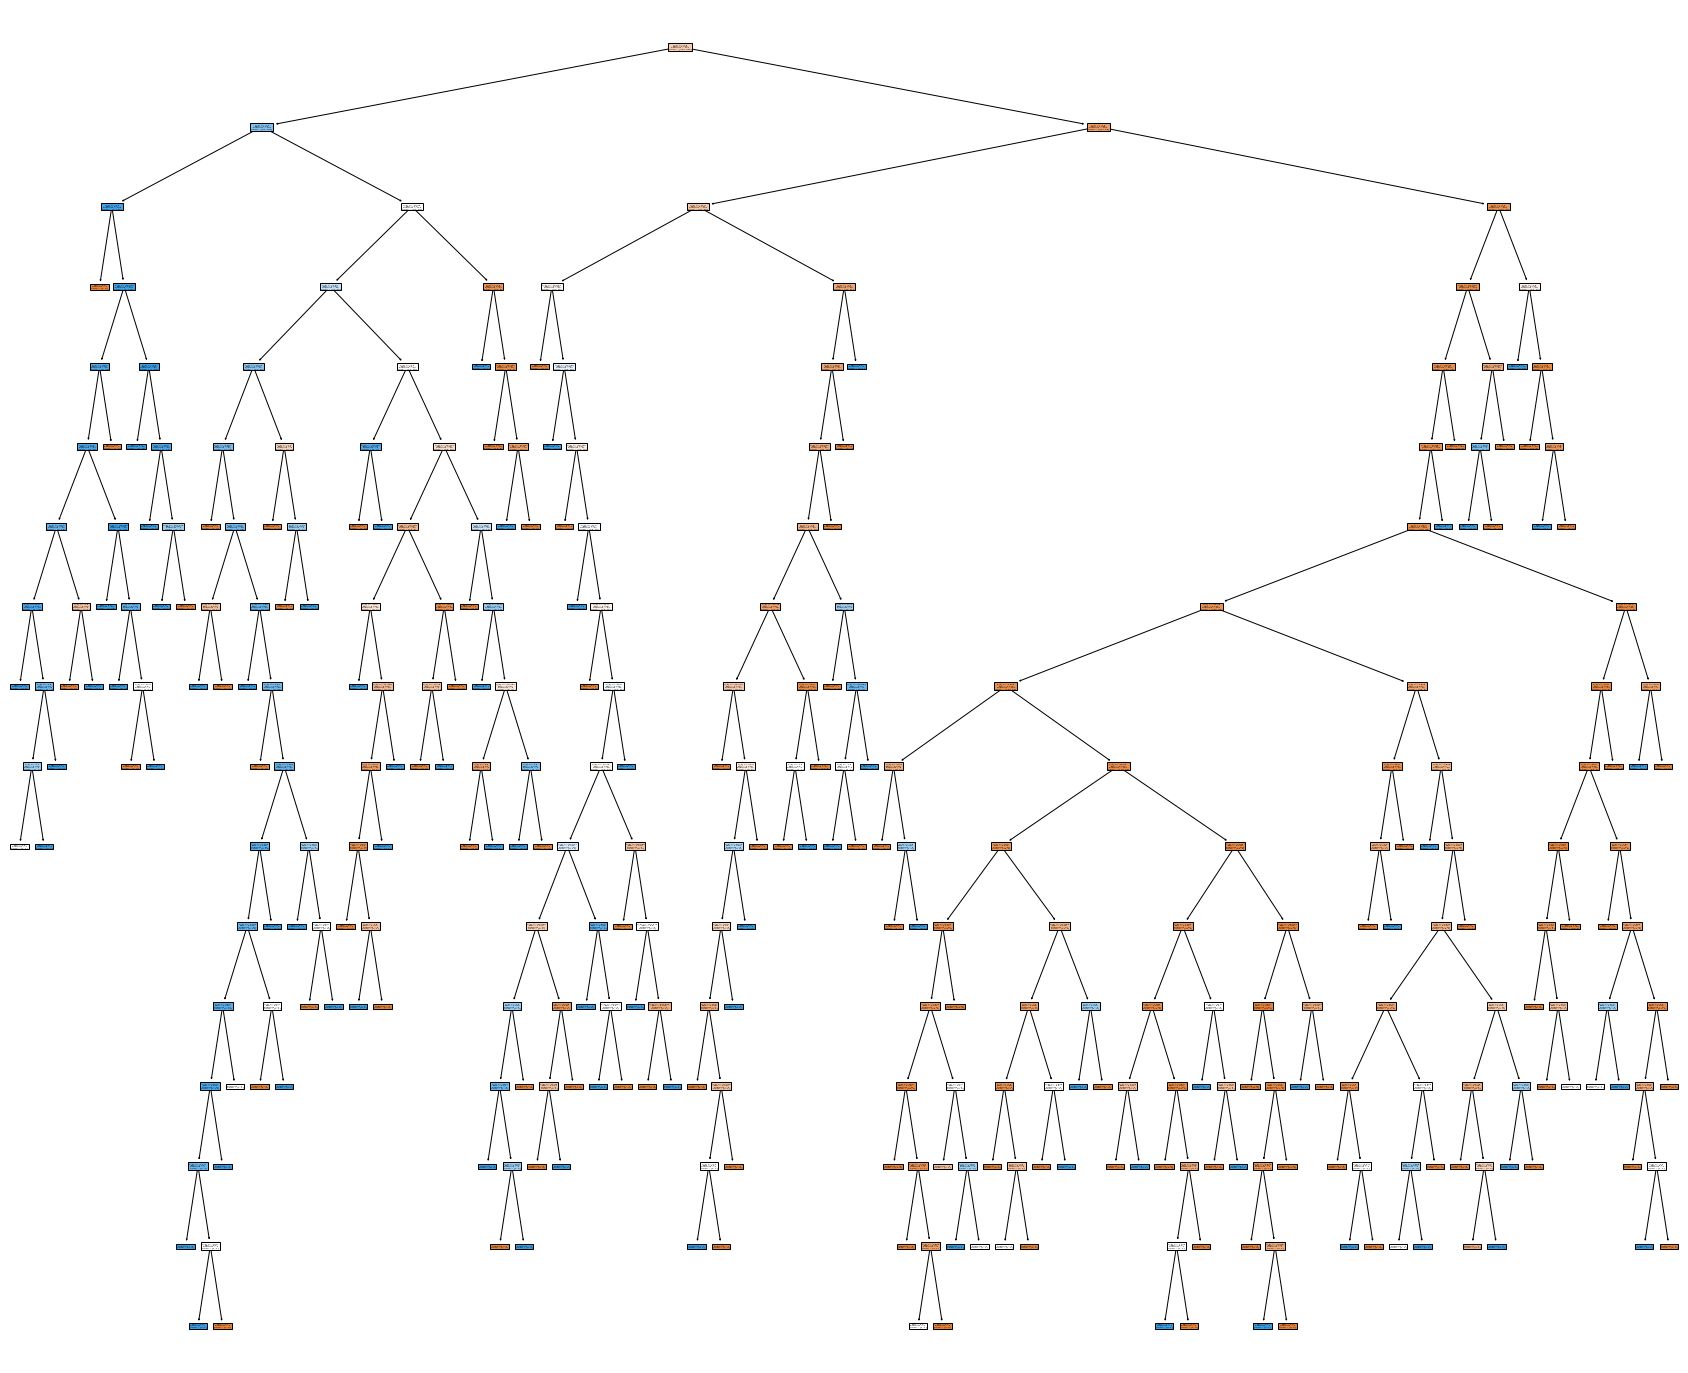

In [72]:
fig = plt.figure(figsize=(30,25))
tree_plt = tree.plot_tree(model,filled=True)

The tree is way too big and cannot be interpreted manually. We will try to reduce the depth of the tree in order to be able to interpret it and more importantly to avoid overfitting and promote generalization.

In [75]:
model = tree.DecisionTreeClassifier(min_samples_leaf=4, max_depth=6, max_leaf_nodes=15)  
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.8547486033519553


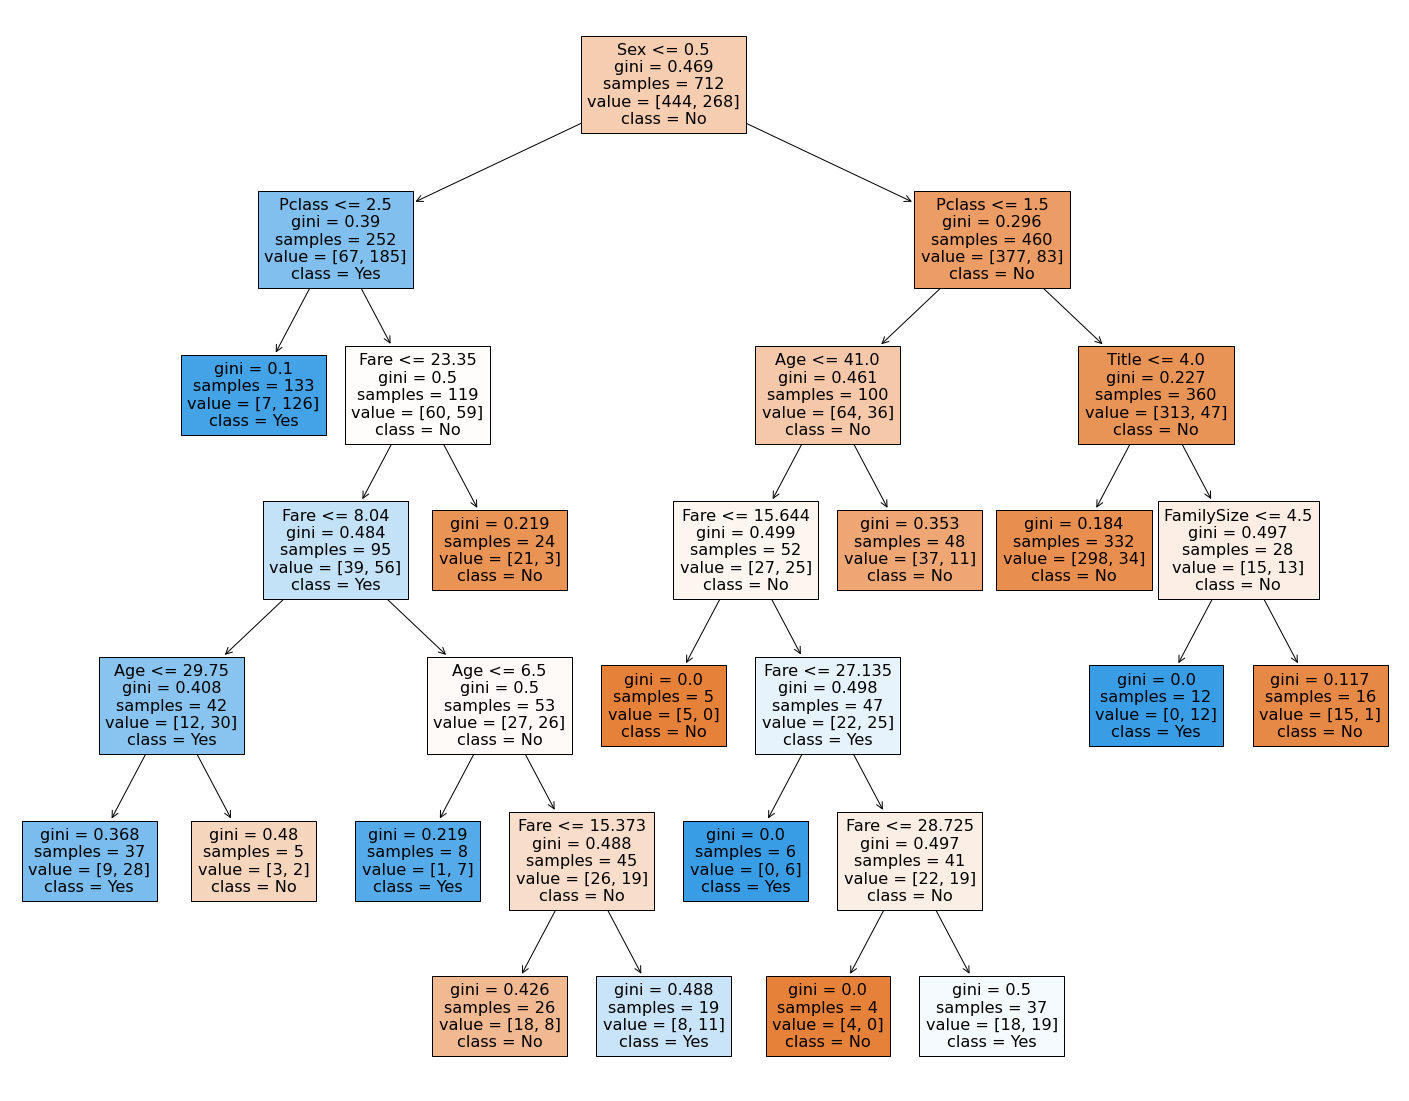

In [78]:
fig = plt.figure(figsize=(25,20))
tree_plt = tree.plot_tree(model, feature_names=x.columns, class_names=["No", "Yes"], filled=True)

Now it is easier to interpret the tree, and we can also notice that we have slightly better results.
interpretation : we can see for example that male passengers traveling in first class with a familysize equals or smaller than 4 all survived. (gini=0)


In [101]:
model=RandomForestClassifier()
model.fit(x_train, y_train)
y_pred_=model.predict(x_test)  
print("Accuracy:", accuracy_score(y_test, y_pred))  

Accuracy: 0.8435754189944135


Estimator:10 , Accuracy:0.8100558659217877
Estimator:20 , Accuracy:0.8379888268156425
Estimator:30 , Accuracy:0.8435754189944135
Estimator:40 , Accuracy:0.8379888268156425
Estimator:50 , Accuracy:0.8435754189944135
Estimator:60 , Accuracy:0.8379888268156425
Estimator:70 , Accuracy:0.8324022346368715
Estimator:80 , Accuracy:0.8547486033519553
Estimator:90 , Accuracy:0.8435754189944135
Estimator:100 , Accuracy:0.8491620111731844
Estimator:200 , Accuracy:0.8268156424581006
Estimator:300 , Accuracy:0.8491620111731844
Estimator:400 , Accuracy:0.8379888268156425
Estimator:500 , Accuracy:0.8324022346368715
Estimator:600 , Accuracy:0.8379888268156425
Estimator:700 , Accuracy:0.8435754189944135
Estimator:900 , Accuracy:0.8379888268156425
Estimator:1000 , Accuracy:0.8435754189944135


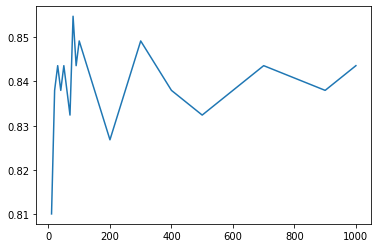

In [110]:
estimators=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 900, 1000]
acc=[]
for e in estimators:
  model=RandomForestClassifier(n_estimators=e)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)  
  print("Estimator:{} , Accuracy:{}".format(e , accuracy_score(y_test, y_pred)))  
  acc.append(accuracy_score(y_test,y_pred))
plt.plot(estimators,acc)

The majority of prediction accuracies lay between 0.83 and 0.85. We can also see that the results of the random forest algorithm are slightly better than the decision tree classifier, or at least when left with default parameters, as the accuracy went up to 0.85 when modified the min_samples_leaf, max_depth and max_leaf_nodes parameters.

---

